In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Завантажити власні файли
data = pd.read_csv('spotify-2023-main.csv', delimiter=',', encoding='latin1')

# Дані
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [66]:
# Проведіть обрахунок описової статистики для аналізованих даних.
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [67]:
# Збережіть альтернативний масив. Визначте наявність пропущених даних. Видаліть рядки з пропущеними значеннями.
alternative_data = pd.DataFrame(data)

# Визначення пропущених значень
missing_data = alternative_data.isnull().sum()
print(missing_data)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [68]:
# Видалення рядків з пропущеними значеннями
alternative_data.dropna(inplace=True)
print(alternative_data.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


In [69]:
# Замініть пропущені значення на конкретні значення (0, 1 або середнє значення по масиву) або ж згенеруйте їх.
# Заміна на NAN значень 1 в стовбці artist_count
alternative_data.loc[alternative_data['artist_count'] == 1, 'artist_count'] = np.nan
alternative_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,NaN,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,NaN,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,NaN,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,NaN,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,NaN,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,NaN,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3.0,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [70]:
print(alternative_data.isnull().sum())

track_name                0
artist(s)_name            0
artist_count            494
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts         0
streams                   0
in_apple_playlists        0
in_apple_charts           0
in_deezer_playlists       0
in_deezer_charts          0
in_shazam_charts          0
bpm                       0
key                       0
mode                      0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%            0
instrumentalness_%        0
liveness_%                0
speechiness_%             0
dtype: int64


In [71]:
# Видалення рядків з NAN та визначення викидів за допомогою boxplot
alternative_data.dropna(inplace=True)
alternative_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
5,Sprinter,"Dave, Central Cee",2.0,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2.0,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2.0,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33
10,un x100to,"Bad Bunny, Grupo Frontera",2.0,2023,4,17,2876,40,505671438,41,...,83,F#,Minor,57,56,72,23,0,27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,Con La Brisa,"Ludwig Goransson, Foudeqush",2.0,2022,11,4,486,0,71095708,8,...,114,D,Minor,62,25,44,51,33,14,3
943,Privileged Rappers,"Drake, 21 Savage",2.0,2022,11,4,1007,0,112436403,6,...,144,F,Major,93,62,61,0,0,12,20
946,Broke Boys,"Drake, 21 Savage",2.0,2022,11,4,1060,0,106249219,3,...,120,D,Major,64,11,53,1,0,25,27
950,A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6


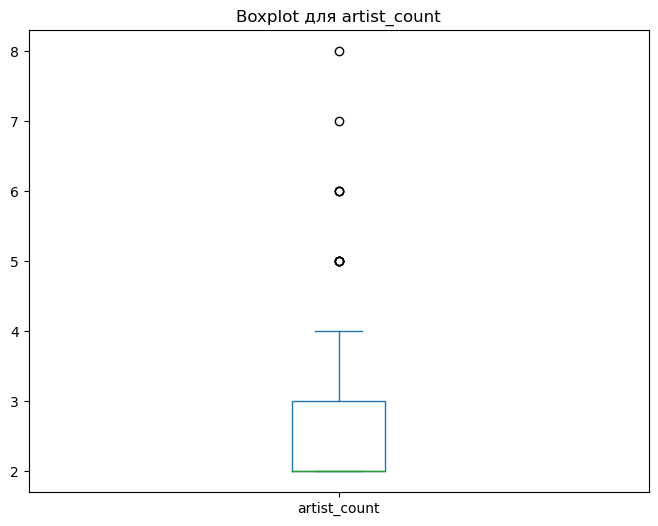

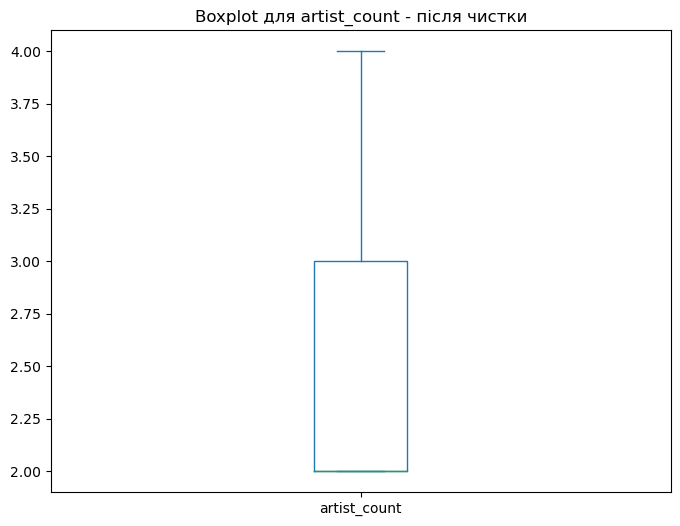

In [72]:
# Визначте наявність «викидів» та приберіть їх з досліджуваного масиву (за допомогою функції boxplot або термокарт).
# У випадку їх відсутності – діяти аналогічно попередньому пункту.
# Побудова boxplot для визначення викидів
plt.figure(figsize=(8, 6))
alternative_data['artist_count'].plot(kind='box')
plt.title('Boxplot для artist_count')
plt.show()

# Визначення викидів за допомогою міжквартильного діапазону
Q1 = alternative_data['artist_count'].quantile(0.25)
Q3 = alternative_data['artist_count'].quantile(0.75)
IQR = Q3 - Q1

# Визначення верхньої та нижньої межі для викидів
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Прибирання викидів
alternative_data = alternative_data[(alternative_data['artist_count'] >= lower_bound) & (alternative_data['artist_count'] <= upper_bound)]

# Побудова boxplot для визначення викидів
plt.figure(figsize=(8, 6))
alternative_data['artist_count'].plot(kind='box')
plt.title('Boxplot для artist_count - після чистки')
plt.show()

In [73]:
# Перерахуйте показники описової статистики для отриманого масиву.
description_after_outlier_removal = alternative_data.describe()
description_after_outlier_removal

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,2.329073,2019.849840,6.083067,13.837061,4147.220447,12.984026,62.207668,49.051118,3.086262,121.201278,71.734824,54.332268,67.070288,23.757188,0.485623,19.194888,12.584665
std,0.557885,9.965958,3.472345,9.690514,6718.781333,19.956597,81.939970,50.256942,6.433753,26.868526,12.969267,22.980304,14.085869,22.240926,3.591383,14.881488,11.517546
min,2.000000,1930.000000,1.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,67.000000,23.000000,4.000000,25.000000,0.000000,0.000000,3.000000,2.000000
25%,2.000000,2021.000000,3.000000,4.000000,782.000000,0.000000,13.000000,6.000000,0.000000,98.000000,63.000000,39.000000,59.000000,6.000000,0.000000,10.000000,5.000000
50%,2.000000,2022.000000,5.000000,13.000000,1678.000000,4.000000,29.000000,34.000000,0.000000,120.000000,74.000000,55.000000,69.000000,17.000000,0.000000,13.000000,7.000000
75%,3.000000,2023.000000,9.000000,23.000000,4796.000000,20.000000,78.000000,80.000000,2.000000,140.000000,81.000000,74.000000,78.000000,36.000000,0.000000,26.000000,19.000000
max,4.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,492.000000,263.000000,45.000000,196.000000,96.000000,97.000000,97.000000,93.000000,47.000000,97.000000,64.000000


In [74]:
# Проведіть операції центрування (від кожного елементу масиву відняти середнє значення)
# та нормування (кожен елемент масиву ділиться на середнє квадратичне відхилення) даних
# та перевірте результати операцій за рахунок обчислення дисперсії та суми всіх елементів отриманих масивів.

#Середнє значення
avg = alternative_data.mean(numeric_only=True)

#Центрування даних
centered_data = alternative_data - avg

print('-----------Mean----------')
print(centered_data.mean(numeric_only=True))

#Обчислення стандартного відхилення
standard_devs = alternative_data.std(numeric_only=True)

print('----------Standard-----------')
standard_devs

-----------Mean----------
acousticness_%          1.816084e-16
artist_count            6.242788e-17
bpm                     1.271259e-15
danceability_%          6.174684e-15
energy_%               -1.135052e-15
in_apple_charts         0.000000e+00
in_apple_playlists      3.632167e-15
in_deezer_charts        3.632167e-16
in_spotify_charts       7.264335e-16
in_spotify_playlists    4.649174e-13
instrumentalness_%     -2.270105e-17
liveness_%             -2.451713e-15
released_day            2.270105e-17
released_month          2.497115e-16
released_year          -7.264335e-15
speechiness_%           9.080418e-17
valence_%              -4.267797e-15
dtype: float64
----------Standard-----------


artist_count               0.557885
released_year              9.965958
released_month             3.472345
released_day               9.690514
in_spotify_playlists    6718.781333
in_spotify_charts         19.956597
in_apple_playlists        81.939970
in_apple_charts           50.256942
in_deezer_charts           6.433753
bpm                       26.868526
danceability_%            12.969267
valence_%                 22.980304
energy_%                  14.085869
acousticness_%            22.240926
instrumentalness_%         3.591383
liveness_%                14.881488
speechiness_%             11.517546
dtype: float64

In [75]:
#Нормування даних
normalized_data = centered_data / standard_devs
normalized_data

,acousticness_%,artist(s)_name,artist_count,bpm,danceability_%,energy_%,in_apple_charts,in_apple_playlists,in_deezer_charts,in_deezer_playlists,...,key,liveness_%,mode,released_day,released_month,released_year,speechiness_%,streams,track_name,valence_%
0,0.325652,NaN,-0.589859,0.141382,0.637289,1.130900,4.257101,-0.234411,1.074604,NaN,...,NaN,-0.752269,NaN,0.016814,0.264067,0.316092,-0.745355,NaN,NaN,1.508585
5,-0.213893,NaN,-0.589859,0.736874,1.562554,-0.643928,3.262214,0.058486,2.162616,NaN,...,NaN,-0.752269,NaN,-1.324704,-0.023922,0.316092,0.991126,NaN,NaN,0.507727
6,1.090009,NaN,-0.589859,0.997402,-0.365080,0.633948,3.441293,-0.344248,1.540895,NaN,...,NaN,-0.752269,NaN,0.223202,-0.887892,0.316092,-0.832179,NaN,NaN,1.247491
9,-0.123969,NaN,-0.589859,1.816204,0.714395,-1.353859,1.212746,-0.161187,1.540895,NaN,...,NaN,-0.752269,NaN,0.326395,-0.887892,0.316092,1.772542,NaN,NaN,0.072572
10,-0.034045,NaN,-0.589859,-1.421785,-1.136134,0.349976,3.103032,-0.258820,1.385465,NaN,...,NaN,0.524485,NaN,0.326395,-0.599902,0.316092,-0.658531,NaN,NaN,0.072572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,1.224896,NaN,-0.589859,-0.268019,-0.750607,-1.637832,-0.956109,-0.661553,-0.479699,NaN,...,NaN,-0.349084,NaN,-1.015123,1.416027,0.215750,-0.832179,NaN,NaN,-1.276409
943,-1.068174,NaN,-0.589859,0.848529,1.639659,-0.430949,-0.876518,-0.685962,-0.479699,NaN,...,NaN,-0.483479,NaN,-1.015123,1.416027,0.215750,0.643829,NaN,NaN,0.333665
946,-1.023212,NaN,-0.589859,-0.044709,-0.596396,-0.998894,-0.816825,-0.722574,-0.479699,NaN,...,NaN,0.390089,NaN,-1.015123,1.416027,0.215750,1.251598,NaN,NaN,-1.885626
950,-0.888326,NaN,-0.589859,-1.086821,0.637289,-0.004990,-0.976007,-0.734778,-0.479699,NaN,...,NaN,-0.752269,NaN,-1.118316,1.416027,0.215750,-0.571707,NaN,NaN,1.160460


In [76]:
#Обчислення дисперсії та суми всіх елементів отриманих масивів
variance = normalized_data.var()
total_sum = normalized_data.sum().sum()

print("")
print("Дисперсія:")
print("------------------------------------------------------------------------------------")
print("")
print(variance)

print("")
print("Сума всіх елементів:")
print("------------------------------------------------------------------------------------")
print(total_sum)


Дисперсія:
------------------------------------------------------------------------------------

acousticness_%          1.0
artist(s)_name          NaN
artist_count            1.0
bpm                     1.0
danceability_%          1.0
energy_%                1.0
in_apple_charts         1.0
in_apple_playlists      1.0
in_deezer_charts        1.0
in_deezer_playlists     NaN
in_shazam_charts        NaN
in_spotify_charts       1.0
in_spotify_playlists    1.0
instrumentalness_%      1.0
key                     NaN
liveness_%              1.0
mode                    NaN
released_day            1.0
released_month          1.0
released_year           1.0
speechiness_%           1.0
streams                 NaN
track_name              NaN
valence_%               1.0
dtype: float64

Сума всіх елементів:
------------------------------------------------------------------------------------
-1.1324274851176597e-13


In [77]:
# Выбираем только числовые колонки для нормализации
numeric_columns = alternative_data.select_dtypes(include=[np.number]).columns

# Сохраняем другие данные (нечисловые)
other_data = alternative_data.drop(numeric_columns, axis=1)

# Проводим операции центрирования и нормирования только для числовых колонок
centered_data = alternative_data[numeric_columns] - alternative_data[numeric_columns].mean()
standard_devs = alternative_data[numeric_columns].std()
normalized_data = centered_data / standard_devs

# Соединяем данные обратно с другими данными
normalized_df = pd.concat([other_data, normalized_data], axis=1)
normalized_df.info()

#Обчислення дисперсії та суми всіх елементів отриманих масивів
# Рассчет дисперсии и суммы элементов отнормированных массивов
variance_normalized = normalized_data.var(numeric_only=True)
sum_normalized = normalized_data.sum(numeric_only=True)

print('----------Normalized Variance-----------')
print(variance_normalized)
print('----------Sum of Normalized Data-----------')
print(sum_normalized)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            313 non-null    object 
 1   artist(s)_name        313 non-null    object 
 2   streams               313 non-null    object 
 3   in_deezer_playlists   313 non-null    object 
 4   in_shazam_charts      313 non-null    object 
 5   key                   313 non-null    object 
 6   mode                  313 non-null    object 
 7   artist_count          313 non-null    float64
 8   released_year         313 non-null    float64
 9   released_month        313 non-null    float64
 10  released_day          313 non-null    float64
 11  in_spotify_playlists  313 non-null    float64
 12  in_spotify_charts     313 non-null    float64
 13  in_apple_playlists    313 non-null    float64
 14  in_apple_charts       313 non-null    float64
 15  in_deezer_charts      3

In [78]:
normalized_df.to_csv("spotify_normalized_data.csv")
